In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os
import healpy as hp
import sys
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from dance.simulations import Sky, CMB
from dance.filtering import WienerFilter
from dance.qe import Reconstruct
from dance import utils
from dance.delens import Delens
from dance.spectra import Likelihood

MPI startup(): FI_PSM3_UUID was not generated, please set it to avoid possible resources ownership conflicts between MPI processes


In [3]:
basedir = '/mnt/sdceph/users/alonappan/DANCE'

In [4]:
delens_iso = Delens(basedir,1024,"iso",beta=0.35,lmin_ivf=2,lmax_ivf=3000,lmax_qlm=3000,qe_key="p_p",lmin_delens=50,lmax_delens=3000)

CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


In [6]:
recon = Reconstruct(basedir,1024,"iso",beta=0.35,lmin_ivf=2,lmax_ivf=3000,lmax_qlm=3000,qe_key="p_p")

CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


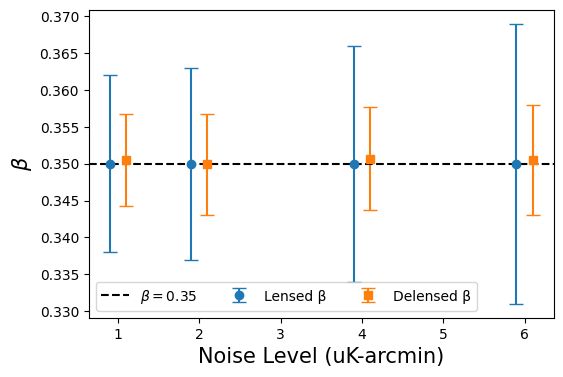

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Data
noise_levels = np.array([1, 2, 4, 6])  # in uK-arcmin
lensed_beta = np.array([0.35, 0.350, 0.350, 0.35])
delensed_beta = np.array([0.3505, 0.3499, 0.3507, 0.3505])

lensed_error = np.array([0.012, 0.013, 0.016, 0.019])
delensed_error = np.array([0.0063, 0.0069, 0.0070, 0.0075])

# Slightly separate the lensed and delensed cases
x_lensed = noise_levels - 0.1
x_delensed = noise_levels + 0.1

# Plot
plt.figure(figsize=(6, 4))
plt.errorbar(x_lensed, lensed_beta, yerr=lensed_error, fmt='o', label="Lensed β", capsize=5)
plt.errorbar(x_delensed, delensed_beta, yerr=delensed_error, fmt='s', label="Delensed β", capsize=5)

# Reference line at β = 0.35
plt.axhline(0.35, color='black', linestyle='dashed', label=r'$\beta = 0.35$')

# Labels and legend
plt.xlabel("Noise Level (uK-arcmin)", fontsize=15)
plt.ylabel(r"$\beta$", fontsize=15)
plt.legend(loc='lower left',ncol=3)
plt.savefig("beta_vs_noise.pdf", bbox_inches='tight', dpi=300)

# Show plot